# Main project 1

# Mushroom Classification: Edible or Poisonous

<b>Data Cleaning And Preprocessing</b>

In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline

In [2]:
# load the dataset

data = pd.read_csv(r"C:\Users\santhosh\Downloads\mushroom.csv\mushroom.csv")
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [3]:
# Check for Missing Values:

data.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [4]:
#Handling Missing Values:
#If the dataset has missing values, decide whether to fill them (e.g., with the most frequent value) or remove rows/columns with missing values.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [5]:
data.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [7]:
# Check for duplicates Values:
data.duplicated().sum()

146

In [8]:
#Handling duplicate Values:
#If the dataset has duplicates values, decide to remove rows/columns with duplicates values.

data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

<b>Exploratory Data Analysis</b>

Example 1: Bar plot of class distribution

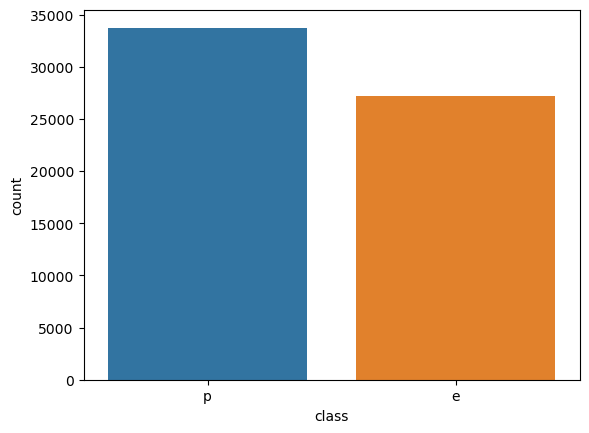

In [10]:

sns.countplot(x='class', data=data)
plt.show()

Example 2: Visualize distributions

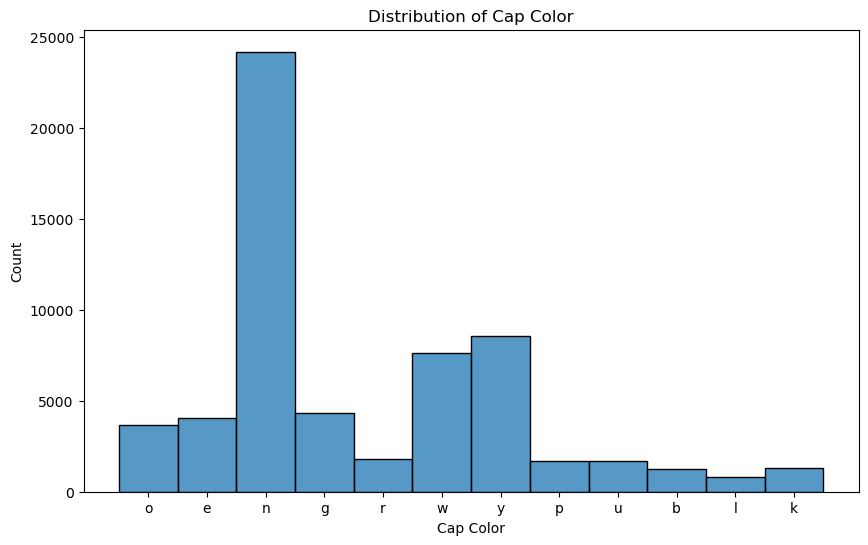

In [11]:

plt.figure(figsize=(10, 6))
sns.histplot(data['cap-color'], bins=20)
plt.title('Distribution of Cap Color')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.show()

Example 3: Identify trends

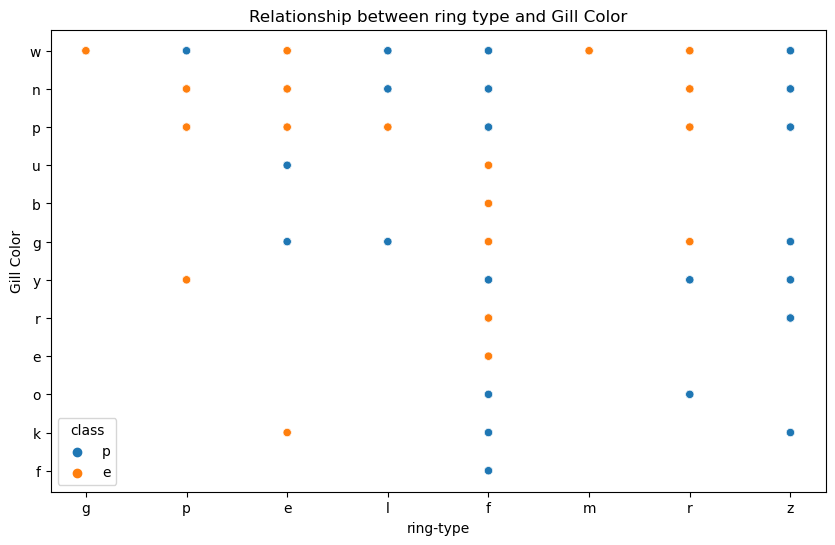

In [12]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ring-type', y='gill-color', hue='class', data=data)
plt.title('Relationship between ring type and Gill Color')
plt.xlabel('ring-type')
plt.ylabel('Gill Color')
plt.show()

Example 4: Distribution of 'cap-diameter' based on 'class'

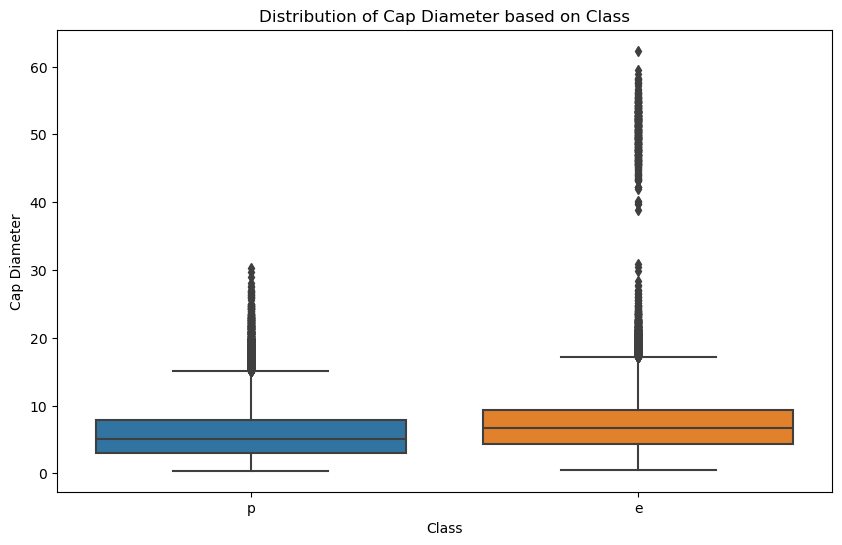

In [13]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='cap-diameter', data=data)
plt.title('Distribution of Cap Diameter based on Class')
plt.xlabel('Class')
plt.ylabel('Cap Diameter')
plt.show()

Example 5: pair plot of class wise whole distribution

<Figure size 1000x500 with 0 Axes>

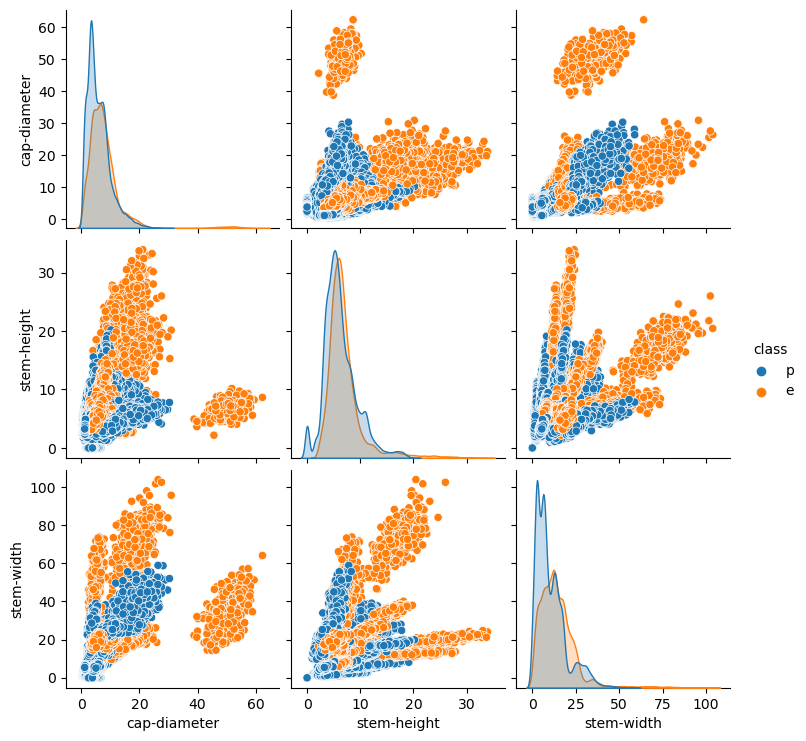

In [14]:

plt.figure(figsize = (10,5))
sns.pairplot(data, hue='class')

Example 6: Heatmap of correlations

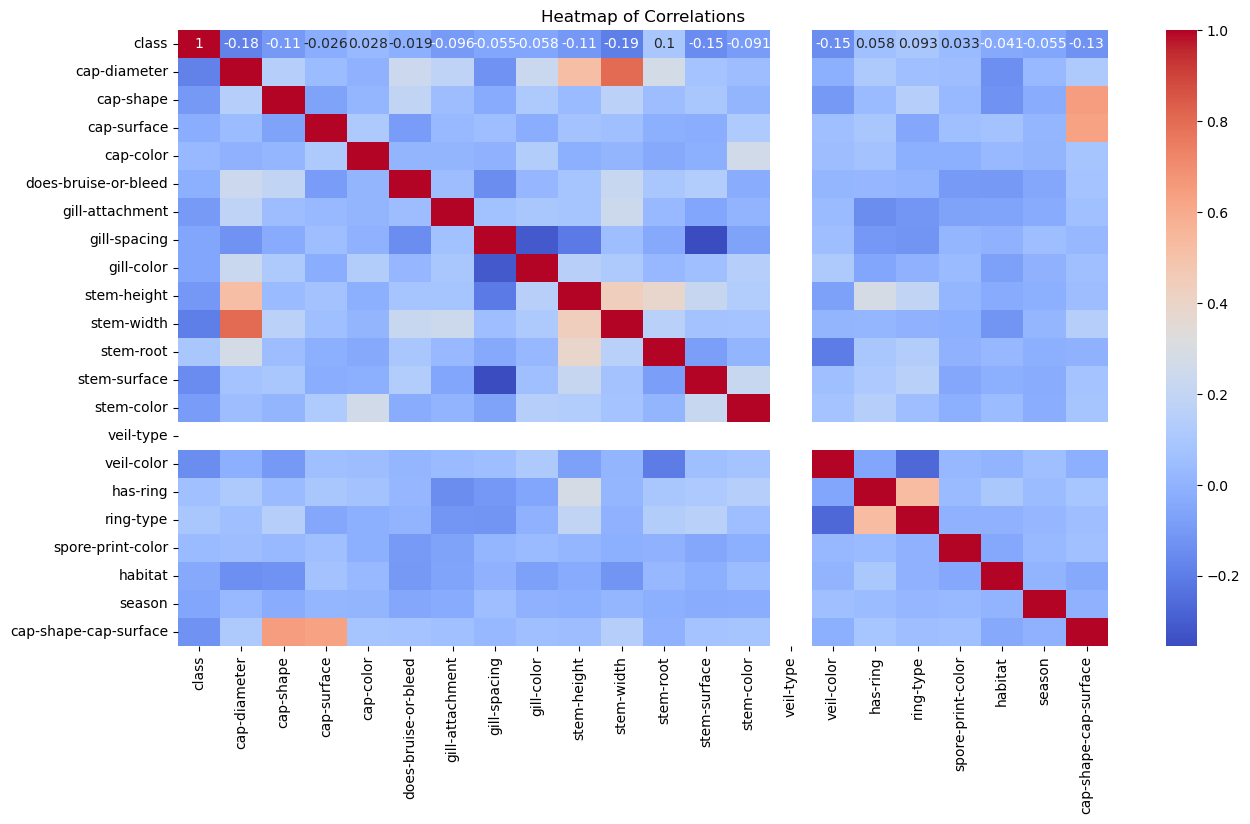

In [35]:

plt.figure(figsize=(15, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Check for Outliers:

For categorical data like this, outliers are less of a concern unless there are data entry errors.

In [15]:

for column in data.columns:
    print(data[column].value_counts())

class
p    33742
e    27181
Name: count, dtype: int64
cap-diameter
3.18     99
3.14     97
3.85     94
4.04     93
3.25     93
         ..
51.39     1
47.85     1
50.18     1
45.67     1
20.42     1
Name: count, Length: 2571, dtype: int64
cap-shape
x    26932
f    13404
s     7164
b     5694
o     3316
p     2598
c     1815
Name: count, dtype: int64
cap-surface
t    22304
s     7580
y     6341
h     4974
g     4722
d     4432
e     2584
k     2303
i     2225
w     2150
l     1308
Name: count, dtype: int64
cap-color
n    24205
y     8541
w     7649
g     4312
e     4035
o     3653
r     1779
u     1709
p     1703
k     1279
b     1230
l      828
Name: count, dtype: int64
does-bruise-or-bleed
f    50333
t    10590
Name: count, dtype: int64
gill-attachment
a    22552
d    10247
x     7413
p     6001
e     5648
s     5648
f     3414
Name: count, dtype: int64
gill-spacing
c    49744
d     7765
f     3414
Name: count, dtype: int64
gill-color
w    18492
n     9645
y     9545
p     5983
g     

<b>Preprocessing Techniques</b>

1) Label Encoding:
* Convert categorical variables to numerical values.

In [16]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])


2) Splitting Data:

* Split the data into features (X) and target (y).

In [17]:
X = data.drop('class', axis=1)
y = data['class']

3) Train-Test Split:

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b>Feature Engineering</B>

1) Interaction Features:

* Create new features based on combinations of existing features.

In [19]:
data['cap-shape-cap-surface'] = data['cap-shape'] * data['cap-surface']

2) Polynomial Features:

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

<b>Model Building and Evaluation</b>

* LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.6287136838649668
              precision    recall  f1-score   support

           0       0.60      0.50      0.55      8150
           1       0.65      0.73      0.69     10127

    accuracy                           0.63     18277
   macro avg       0.62      0.62      0.62     18277
weighted avg       0.63      0.63      0.62     18277



* DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9960059090660393
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8150
           1       1.00      1.00      1.00     10127

    accuracy                           1.00     18277
   macro avg       1.00      1.00      1.00     18277
weighted avg       1.00      1.00      1.00     18277



* RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9997811457022487
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8150
           1       1.00      1.00      1.00     10127

    accuracy                           1.00     18277
   macro avg       1.00      1.00      1.00     18277
weighted avg       1.00      1.00      1.00     18277



* KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model with the number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


k-NN Accuracy: 0.8093231930842042
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      8150
           1       0.83      0.83      0.83     10127

    accuracy                           0.81     18277
   macro avg       0.81      0.81      0.81     18277
weighted avg       0.81      0.81      0.81     18277



* KNeighborsClassifier

In [25]:
from sklearn.ensemble import KNeighborsClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

Gradient Boosting Accuracy: 0.9238934179569951
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      8150
           1       0.93      0.93      0.93     10127

    accuracy                           0.92     18277
   macro avg       0.92      0.92      0.92     18277
weighted avg       0.92      0.92      0.92     18277



<b>Choosing the Best Model</b>

In [26]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'knn', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_gbc)]

best_model_index = np.argmax(accuracies)
print(f"The best model is {models[best_model_index]} with an accuracy of {accuracies[best_model_index]:.2f}")

The best model is Random Forest with an accuracy of 1.00
